**Part 1**

- Consider a mutual fund with beta of 0.8 which has an expected rate of return of 14%. If risk-free rate of return is rf = 5%, and you expect the rate of return on market portfolio to be 15%.

- Use Python to address the following questions:

- Would you be interested in investing in the fund? If so, what is the Alpha of the fund.
- What passive portfolio comprised of a market-index portfolio and a money-market account would have the same beta as the fund?
- Note: show that the difference between the expected rate of return on this passive portfolio and that of the fund equals the alpha from question 

In [149]:
b = 0.08 #beta
expRet = .14 #expected return Fund
rf = .05 #riskfree rate
expRtM = .15 #mkt return

#expRet = rf + b (expRtm - rf) + A
A = expRet - rf - b * (expRtM - rf)
print(A)

0.082


**Would i be interested in this fund**
- sure it beats the market by 8.2%


In [150]:
b = 0.08 #same beta
rf = .05 #risk free
expM = 0.15 #market exp return

#expR
expP = expM

A = expM - rf + b*(expM - rf)
print(A)

0.108


**Part 2**
Consider the following data for a one-factor economy. All portfolios are assumed to be well diversified

- Portfolio     Exp Return     Beta
- A             12% - 20%       1.2-1.7
- F             6%-9%          0.0-0.9

Note: Consider that Expected Return changes in step sizes of 1% (e.g. Portfolio A can have expected returns of 12%,13%,…19%,20%) and Beta change in step sizes of 0.1 (e.g Portfolio F can have Beta values of 0.0,0.1,0.2,….0.8,0.9)

Suppose that another portfolio, portfolio E, is well diversified with a beta of 0.6 and expected return of 8%.

For which range of values of Expected Return and Beta would an arbitrage opportunity exist?
Develop a simple strategy in Python to exploit the most of the juice out of the arbitrage opportunity strategy for each of the cases
Plot the risk-reward profiles of these strategies (for each set of combination of Expected Return and Beta for Portfolio A & F) and discuss

In [151]:
import pylab as pl

Aer = pl.frange(0.12, 0.20, 0.01) #port A exp Returns
Fer = pl.frange(0.06, 0.09, 0.01) #port F exp Returns

Ab = pl.frange(1.2, 1.7, 0.1)     #port A exp Beta
Fb = pl.frange(0.0, 0.9, 0.1)     #port F exp Beta

Er = .08
Eb = .6


**Part 3**

Suppose the economy can be in one of the following two states:

Boom or “good” state and
Recession or “bad” state.
Each state can occur with an equal opportunity. The annual return on the market and a certain security X in the two states of the economy are as follows:

Market: at the end of the year, the market is expected to yield a return of 30% in the good state and a return of (-10%) in the bad state;
Security X: at the end of the year, the security is expected to yield a return of 40% in the good state and a return of (-35%) in the bad state;
Furthermore, assume that annual risk-free rate of return is 5%.

Write a Python Program to calculate the beta of security X relative to the market.
Furthermore, calculate the alpha of security X using CAPM.
Draw the security market line (SML). Label the axes and all points (including the market portfolio, the risk-free security, and security X) in the graph clearly. Identify alpha in the graph.

In [152]:
mktg = .30
mktb = -.10

Xg = .40
Xb = -.35

rf = .05


In [153]:
import pandas as pd
import numpy as np

data = {'MktSec': [0.40, -0.35], 'MktPerf': [0.30, -0.15]}
                   
df = pd.DataFrame(data, index = ['Good', 'Bad'])
df

,MktPerf,MktSec
Good,0.30,0.40
Bad,-0.15,-0.35


In [154]:
cov = df.cov() * 250
cov

,MktPerf,MktSec
MktPerf,25.3125,42.1875
MktSec,42.1875,70.3125


In [155]:
cov_with_market = cov.iloc[0,1]
cov_with_market

42.187499999999993

In [156]:
market_var = df['MktPerf'].var() * 250
market_var

25.312499999999996

** Beta: **
### $$ 
\beta_{pg} = \frac{\sigma_{pg,m}}{\sigma_{m}}
$$

In [157]:
MktSecBeta = cov_with_market / market_var
MktSecBeta

1.6666666666666665

**Calculate the Alpa of Port (CAPM):**
### $$
\alpha = \overline{r_{pg}} - r_f - \beta_{pg}(\overline{r_{m}} - r_f) 
$$

In [158]:
epM = df['MktPerf']
epRet = df['MktSec']
b = MktSecBeta
rfx = 0.05

Ax = epRet - rfx - b * (expRtM - rfx)
print(Ax)

Good    0.183333
Bad    -0.566667
Name: MktSec, dtype: float64


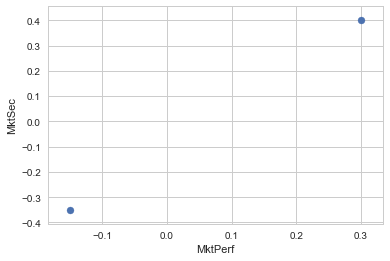

In [159]:
from scipy import stats
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import numpy as np


X = df['MktPerf']
Y = df['MktSec']

plt.scatter(X,Y)
plt.ylabel('MktSec')
plt.xlabel('MktPerf')
plt.show()

In [160]:
beta, alpha, r_value, p_value, std_err = stats.linregress(Y,X)
print(beta, alpha)

(0.59999999999999998, 0.059999999999999984)


In [161]:
# creating the model
model = sm.OLS(Y,X).fit()

# lets see what we got so far
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 MktSec   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     14.69
Date:                Sat, 08 Jul 2017   Prob (F-statistic):              0.162
Time:                        18:48:29   Log-Likelihood:                 1.8727
No. Observations:                   2   AIC:                            -1.745
Df Residuals:                       1   BIC:                            -3.052
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MktPerf        1.5333      0.400      3.833      0.1

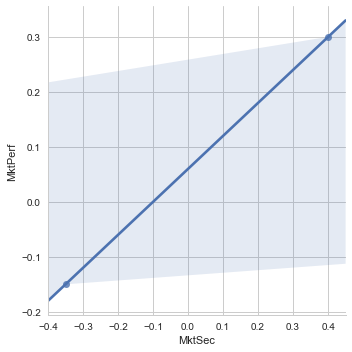

In [162]:
import seaborn as sns
X = df['MktPerf']
Y = df['MktSec']
sns.lmplot(x="MktSec", y="MktPerf", data=df);

**Part 4**

In the Unit 3 Mini Project, you wrote a Python program to download data for S&P 500 and quantitatively identified Bull and Bear Phases. As an extension of the same project, now do the following:

Run the same program on last 25 years (1990-2015) of S&P 500 data and identify the frequency and duration (in days) of Bull and Bear Periods. What inferences can you draw from this statistic.

In [163]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

####

## 1. Download 15 yrs DJIA
start = datetime.datetime(1993, 1, 23)
end = datetime.datetime(2017, 6, 1)

data = data.DataReader('spy',  'google', start, end)
#df = data['Close']
#returns = np.log(data / data.shift(1))
data = data.iloc[:, :-1] #Remove Volume
data['mid'] = data['Close'] #bad data from google need to just use close
data = data.iloc[:, 4:]
data = pd.DataFrame(data)

###
data.head()

,mid
Date,
2001-07-05,121.68
2001-07-06,119.05
2001-07-09,119.70
2001-07-10,118.26
2001-07-11,118.38


In [164]:
data['SMA'] = data.rolling(center=False,window=200).mean()
data = data.dropna()
data['devs'] = (data['mid'] - data['SMA']) / data['SMA'] * 100
data.head()

,mid,SMA,devs
Date,,,
2002-04-25,109.47,113.44345,-3.502582
2002-04-26,107.39,113.37200,-5.276435
2002-04-29,106.86,113.31105,-5.693222
2002-04-30,107.86,113.25185,-4.760938
2002-05-01,109.18,113.20645,-3.556732


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013642828>], dtype=object)

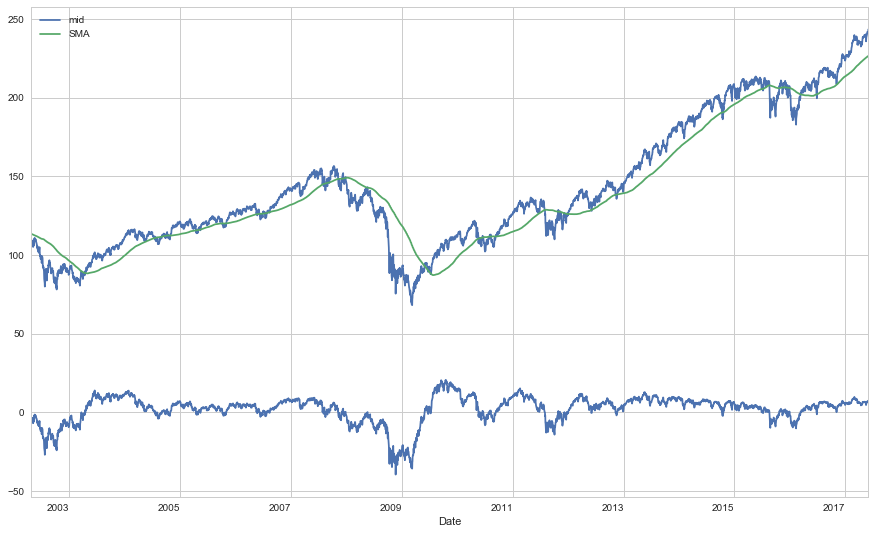

In [165]:
data[['mid','SMA']].plot(figsize=(15,10))
data['devs'].plot(subplots=True,figsize=(15,10))


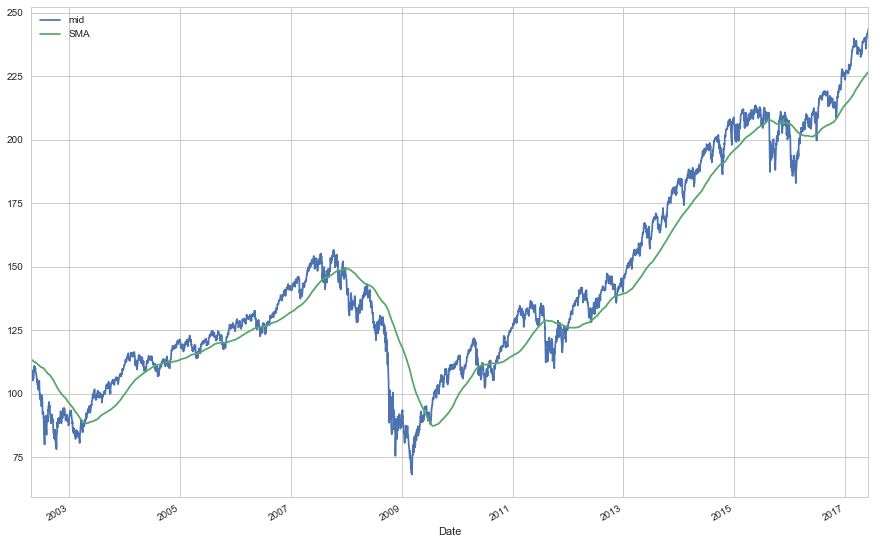

In [166]:
data['position'] = np.where(data['mid'] > data['SMA'], 1, -1)
data[['mid','SMA']].plot(figsize=(15,10))
#data['devs'].plot(subplots=True,figsize=(15,10))

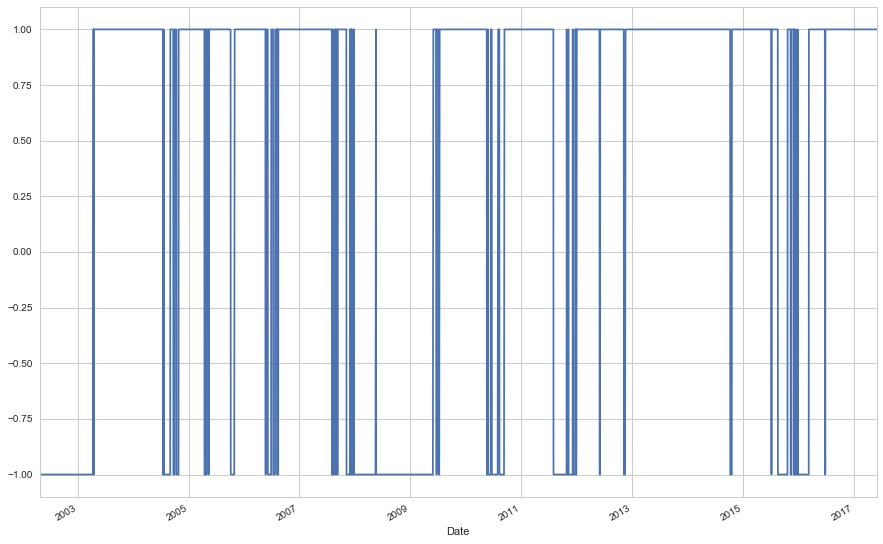

In [167]:
data['position'].plot(figsize=(15,10))

In [168]:
data.head()

,mid,SMA,devs,position
Date,,,,
2002-04-25,109.47,113.44345,-3.502582,-1
2002-04-26,107.39,113.37200,-5.276435,-1
2002-04-29,106.86,113.31105,-5.693222,-1
2002-04-30,107.86,113.25185,-4.760938,-1
2002-05-01,109.18,113.20645,-3.556732,-1


- Download data for each of the following stocks for last 10 years till 2010 (2000-2010) and identify the frequency and duration (in days) of Bull and Bear Periods – EBAY, ORCL, GE, GM, PFE. 
- Also calculate the historical Beta of these stocks
- Based on observations made for the overlapping 10 years period between the S&P500 and the 5 stocks, Rank them in their expected order out outperformance (Alpha Generation expectancy) for the next 5 years (2011-2015)
- Compare and analyze the difference between expected Alpha and Actual Alpha generated in the 2011-2015 period.

In [171]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import datetime
%matplotlib inline
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2010, 1, 1)
df = data.DataReader(['EBAY', 'SPY', 'ORCL', 'GE', 'F', 'PFE'],'google', start, end)
df = df['Close']
df.head()

,EBAY,F,GE,ORCL,PFE,SPY
Date,,,,,,
2000-01-03,17.66,29.93,49.95,118.13,31.88,145.44
2000-01-04,16.00,28.93,48.06,107.69,30.75,139.75
2000-01-05,17.07,29.04,47.70,102.00,31.31,140.00
2000-01-06,16.86,29.07,48.51,96.00,32.31,139.56
2000-01-07,16.84,31.21,50.28,103.38,34.38,145.75


In [187]:
dfr = np.log( df / df.shift(1))
dfr.head()

,EBAY,F,GE,ORCL,PFE,SPY
Date,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.098713,-0.033982,-0.038572,-0.092529,-0.036089,-0.039909
2000-01-05,0.064734,0.003795,-0.007519,-0.054284,0.018048,0.001787
2000-01-06,-0.012379,0.001033,0.016839,-0.060625,0.031439,-0.003148
2000-01-07,-0.001187,0.071032,0.035837,0.074063,0.062098,0.043398


In [188]:
cov = dfr.cov() * 250
EBAY_cov_market = cov.iloc[0,5]
EBAY_cov_market

0.06379828817210198

In [189]:
F_cov_market = cov.iloc[1,5]
F_cov_market

0.05570032858262678

In [190]:
GE_cov_market = cov.iloc[2,5]
GE_cov_market

0.056413356024732117

In [191]:
ORCL_cov_market = cov.iloc[3,5]
ORCL_cov_market

0.062432899012862919

In [192]:
PFE_cov_market = cov.iloc[4,5]
PFE_cov_market

0.034796823511870356

** Beta: **
### $$ 
\beta_{pg} = \frac{\sigma_{pg,m}}{\sigma_{m}}
$$

In [194]:
market_var = dfr['SPY'].var() * 250
market_var

0.050011398178183376

In [195]:
EBAY_beta = EBAY_cov_market / market_var
EBAY_beta

1.275674956032981

In [196]:
F_beta = F_cov_market / market_var
F_beta

1.1137526766233283

In [197]:
GE_beta = GE_cov_market / market_var
GE_beta

1.1280099753208157

In [198]:
ORCL_beta = ORCL_cov_market / market_var
ORCL_beta

1.2483733966089796

In [199]:
PFE_beta = PFE_cov_market / market_var
PFE_beta

0.69577785823732241

- Based on observations made for the overlapping 10 years period between the S&P500 and the 5 stocks, Rank them in their expected order out outperformance (Alpha Generation expectancy) for the next 5 years (2011-2015)
- Compare and analyze the difference between expected Alpha and Actual Alpha generated in the 2011-2015 period.

Assume a risk-free rate of 2.5% and a risk premium of 5%

**Calculate the expected returns of stocks (CAPM):**
### $$
\overline{r_{pg}} = r_f + \beta_{pg}(\overline{r_{m}} - r_f) 
$$

In [202]:
EBAY_er = (0.025 + EBAY_beta * 0.05) * 100
F_er = (0.025 + F_beta * 0.05) * 100
GE_er = (0.025 + GE_beta * 0.05) * 100
ORCL_er = (0.025 + ORCL_beta * 0.05) * 100
PFE_er = (0.025 + PFE_beta * 0.05) * 100

print(EBAY_er,F_er,GE_er,ORCL_er,PFE_er)

(8.8783747801649042, 8.068763383116643, 8.1400498766040794, 8.7418669830448987, 5.9788892911866123)


In [232]:
expRtM = 0.07
rfr = .025

#Calc Alpha
EBAY_A = expRet - rfr - EBAY_beta * (expRtM - rfr)
F_A = expRet - rfr - F_beta * (expRtM - rfr)
GE_A = expRet - rfr - GE_beta * (expRtM - rfr)
ORCL_A = expRet - rfr - ORCL_beta * (expRtM - rfr)
PFE_A = expRet - rfr - PFE_beta * (expRtM - rfr)
print(EBAY_A,F_A,GE_A,ORCL_A,PFE_A)
##Actual ALphas from 2000 to 2010

(0.057594626978515868, 0.064881129551950245, 0.064239551110563314, 0.05882319715259593, 0.083689996379320508)


Ranking
- 1. PFR 8.36%
- 2. F   6.5%
- 3. GE  6.42%
- 4. ORLC 5.88%
- 5. EBAY 5.75%

In [4]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import datetime
%matplotlib inline
start = datetime.datetime(2011, 1, 1)
end = datetime.datetime(2017, 1, 1)
dr = data.DataReader(['EBAY', 'SPY', 'ORCL', 'GE', 'F', 'PFE'],'google', start, end)
dr = dr['Close']
dr.tail()

,EBAY,F,GE,ORCL,PFE,SPY
Date,,,,,,
2016-12-23,29.79,12.46,31.88,38.78,32.48,225.71
2016-12-27,30.24,12.39,31.90,38.82,32.53,226.27
2016-12-28,30.01,12.25,31.70,38.68,32.35,224.40
2016-12-29,29.98,12.23,31.71,38.69,32.49,224.35
2016-12-30,29.69,12.13,31.60,38.45,32.48,223.53


In [5]:
#mkt Return
#Spy Start value = 127.05
#Spy End value = 223.53
#223.53 - 127.05 = 
CAGR = (96.48/127.05)**(1/6.0)-1
print(CAGR)

-0.044837850439


In [6]:
dr = np.log( dr / dr.shift(1))
dr.head()

,EBAY,F,GE,ORCL,PFE,SPY
Date,,,,,,
2011-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,-0.007349,0.007508,0.017892,-0.004437,0.017382,-0.000551
2011-01-05,0.009091,0.028922,0.001611,-0.014076,0.006648,0.005184
2011-01-06,-0.010849,0.018278,-0.004301,0.004179,0.003858,-0.001961
2011-01-07,-0.025661,0.002740,-0.007029,-0.004502,0.008762,-0.001964


In [7]:
RtM = CAGR
rfr = .025

#Calc Alpha
EBAY_A2 = expRet - rfr - EBAY_beta * (RtM - rfr)
F_A2 = expRet - rfr - F_beta * (RtM - rfr)
GE_A2 = expRet - rfr - GE_beta * (RtM - rfr)
ORCL_A2 = expRet - rfr - ORCL_beta * (RtM - rfr)
PFE_A2 = expRet - rfr - PFE_beta * (RtM - rfr)
print(EBAY_A2,F_A2,GE_A2,ORCL_A2,PFE_A2)
##Actual ALphas from 2011 to 2017

NameError: name 'expRet' is not defined

** Actual Alpha generated by all stcosk were higher than expected**

Download data for each of the following stocks for last 10 years till 2010 (2000-2010) and identify the frequency and duration (in days) of Bull and Bear Periods – EBAY, ORCL, GE, GM, PFE. Also calculate the historical Beta of these stocks

In [ ]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import datetime
%matplotlib inline
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2017, 1, 1)
dt = data.DataReader(['EBAY', 'ORCL', 'GE', 'F', 'PFE'],'google', start, end)
dt = dt['Close']
dt.tail()

In [ ]:
# Create long simple moving average over the long window
signals['sigE'] = dt['EBAY'].rolling(window=200, min_periods=1, center=False).mean()
signals['sigF'] = dt['F'].rolling(window=200, min_periods=1, center=False).mean()
signals['sigGE'] = dt['GE'].rolling(window=200, min_periods=1, center=False).mean()
signals['sigO'] = dt['ORCL'].rolling(window=200, min_periods=1, center=False).mean()
signals['sigP'] = dt['PFE'].rolling(window=200, min_periods=1, center=False).mean()
signals.head()

In [ ]:
de = pd.merge(dt, signals, right_index=True, left_index=True)
de.head()

In [ ]:
#Initialize the `signals` DataFrame with the `signal` column
de['E_l'] = np.where(de['EBAY'] > de['sigE'], 1, -1)
de['F_l'] = np.where(de['F'] > de['sigF'], 1, -1)
de['G_l'] = np.where(de['GE'] > de['sigGE'], 1, -1)
de['O_l'] = np.where(de['ORCL'] > de['sigO'], 1, -1)
de['P_l'] = np.where(de['PFE'] > de['sigP'], 1, -1)
de.head()
